In [1]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as FF

import math  
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pycountry_convert
import calmap

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
import plotly.offline as po
po.init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_dead = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...      840      906      933      996   
1        0        0        0  ...      518      539      548      562   
2        0        0        0  ...     2268     2418     2534     2629   
3        0        0        0  ...      673      696      704      713   
4        0        0        0  ...       19       19       24       24   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0     1026     1092     1176     1279     1351     1463  
1      584      609      634      663      678      712  
2     2718     2811     2910     3007     3127     3256  
3      717      717      723      723      731      738  
4       24       24       25       25       25       25  

[5 rows x 99 columns]

In [4]:
df_dead.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...       30       30       30       33   
1        0        0        0  ...       26       26       26       26   
2        0        0        0  ...      348      364      367      375   
3        0        0        0  ...       33       35       35       36   
4        0        0        0  ...        2        2        2        2   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0       36       36       40       42       43       47  
1       26       26       27       27       27       27  
2      384      392      402      407      415      419  
3       37       37       37       37       40       40  
4        2        2        2        2        2        2  

[5 rows x 99 columns]

In [5]:
df_rec.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...       54       99      112      131   
1        0        0        0  ...      277      283      302      314   
2        0        0        0  ...      783      846      894     1047   
3        0        0        0  ...      169      191      205      235   
4        0        0        0  ...        5        5        6        6   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0      135      150      166      179      188      188  
1      327      345      356      385      394      403  
2     1099     1152     1204     1355     1408     1479  
3      248      282      309      333      344      344  
4        6        6        6        6        6        6  

[5 rows x 99 columns]

In [6]:
df_group = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfd_group = df_dead.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfr_group = df_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [7]:
df_group.head()

Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...      840      906      933      996   
1        0        0        0  ...      518      539      548      562   
2        0        0        0  ...     2268     2418     2534     2629   
3        0        0        0  ...      673      696      704      713   
4        0        0        0  ...       19       19       24       24   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0     1026     1092     1176     1279     1351     1463  
1      584      609      634      663      678      712  
2     2718     2811     2910     3007     3127     3256  
3      717      717      723      723      731      738  
4       24       24       25       25       25       25  

[5 rows x 98 columns]

In [8]:
dfd_group.head()

Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...       30       30       30       33   
1        0        0        0  ...       26       26       26       26   
2        0        0        0  ...      348      364      367      375   
3        0        0        0  ...       33       35       35       36   
4        0        0        0  ...        2        2        2        2   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0       36       36       40       42       43       47  
1       26       26       27       27       27       27  
2      384      392      402      407      415      419  
3       37       37       37       37       40       40  
4        2        2        2        2        2        2  

[5 rows x 98 columns]

In [9]:
dfr_group.head()

Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  \
0        0        0        0  ...       54       99      112      131   
1        0        0        0  ...      277      283      302      314   
2        0        0        0  ...      783      846      894     1047   
3        0        0        0  ...      169      191      205      235   
4        0        0        0  ...        5        5        6        6   

   4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  
0      135      150      166      179      188      188  
1      327      345      356      385      394      403  
2     1099     1152     1204     1355     1408     1479  
3      248      282      309      333      344      344  
4        6        6        6        6        6        6  

[5 rows x 98 columns]

In [10]:
last_date = df_group.columns.values[-1]

In [11]:
avg = math.ceil(df_group[[last_date]].mean())
df_group[[last_date]].describe()

4/25/20
count     185.000000
mean    15658.075676
std     75332.850197
min         1.000000
25%        82.000000
50%       704.000000
75%      5142.000000
max    938154.000000

In [12]:
avg_dead = math.ceil(dfd_group[[last_date]].mean())
dfd_group[[last_date]].describe()

4/25/20
count    185.000000
mean    1096.454054
std     5222.126708
min        0.000000
25%        2.000000
50%       13.000000
75%      136.000000
max    53755.000000

In [13]:
avg_rec = math.ceil(dfr_group[[last_date]].mean())
dfr_group[[last_date]].describe()

4/25/20
count     185.000000
mean     4414.513514
std     16077.037074
min         0.000000
25%        17.000000
50%       219.000000
75%      1042.000000
max    109800.000000

# Map of confirmed cases globaly

In [14]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df_group['Country/Region'],
    z = df_group[last_date],
    text = df_group['Country/Region'],
    colorscale = 'Peach',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Confirmed cases',
    zmax = avg,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide confirmed cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

In [15]:
dates = df_group.columns[4:]

df_time = df_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')


In [16]:
df_time.head(10)

Country/Region       Lat       Long     Date  Confirmed
0          Afghanistan   33.0000    65.0000  1/23/20          0
1              Albania   41.1533    20.1683  1/23/20          0
2              Algeria   28.0339     1.6596  1/23/20          0
3              Andorra   42.5063     1.5218  1/23/20          0
4               Angola  -11.2027    17.8739  1/23/20          0
5  Antigua and Barbuda   17.0608   -61.7964  1/23/20          0
6            Argentina  -38.4161   -63.6167  1/23/20          0
7              Armenia   40.0691    45.0382  1/23/20          0
8            Australia -255.9695  1129.8623  1/23/20          0
9              Austria   47.5162    14.5501  1/23/20          0

In [17]:
fig = px.choropleth(df_time, locationmode = "country names",
                    locations = 'Country/Region',
                    color="Confirmed",
                    hover_name="Country/Region", 
                    color_continuous_scale='Peach',
                    range_color= [0, avg],
                    animation_frame="Date")

fig.update_layout(
    title_text='Covid 19 confirmed cases timeline',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()

# Deaths due to Covid 19

In [18]:
dfd_time = dfd_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Dead')

dfd_time.head()

Country/Region      Lat     Long     Date  Dead
0    Afghanistan  33.0000  65.0000  1/23/20     0
1        Albania  41.1533  20.1683  1/23/20     0
2        Algeria  28.0339   1.6596  1/23/20     0
3        Andorra  42.5063   1.5218  1/23/20     0
4         Angola -11.2027  17.8739  1/23/20     0

In [19]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfd_group['Country/Region'],
    z = dfd_group[last_date],
    text = dfd_group['Country/Region'],
    colorscale = 'Reds',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Deaths',
    zmax = avg_dead,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

# Recoveries from Covid 19

In [20]:
dfr_time = dfr_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

dfr_time.head()

Country/Region      Lat     Long     Date  Recovered
0    Afghanistan  33.0000  65.0000  1/23/20          0
1        Albania  41.1533  20.1683  1/23/20          0
2        Algeria  28.0339   1.6596  1/23/20          0
3        Andorra  42.5063   1.5218  1/23/20          0
4         Angola -11.2027  17.8739  1/23/20          0

In [21]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfr_group['Country/Region'],
    z = dfr_group[last_date],
    text = dfr_group['Country/Region'],
    colorscale = 'Greens',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Recovered',
    zmax = avg_rec,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide recoveries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

# Continent Data

In [22]:
df_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [23]:
df_country = df_country.drop(columns=['People_Tested', 'People_Hospitalized', 'Last_Update', 'Lat', 'Long_', 'UID'])
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia       6694      80       4223    2391      26.292533   
1        Austria      15148     536      12103    2509     168.191508   
2         Canada      45493    2549      16013   26931     120.174763   
3          China      83909    4636      78175    1098       5.973547   
4        Denmark       8643     418       5858    2367     149.217836   

   Mortality_Rate ISO3  
0        1.195100  AUS  
1        3.538421  AUT  
2        5.603060  CAN  
3        5.525033  CHN  
4        4.836284  DNK

In [24]:
def country_to_continent_code(country):
    try:
        return pycountry_convert.country_alpha2_to_continent_code(pycountry_convert.country_alpha3_to_country_alpha2(country))
    except :
        return 'Other'

In [25]:
code_to_continent = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'Other': 'Other'
}

In [26]:
# list(df_country['Country_Region'].apply(lambda x: country_to_continent_code(x))).count('na')
code = df_country['ISO3'].apply(lambda x: code_to_continent[country_to_continent_code(x)])
df_country[code == 'Other']


Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
60   Diamond Princess        712      13        645      54            NaN   
84           Holy See          9       0          2       7    1112.484549   
98             Kosovo        510      12         93     405      28.171099   
109        MS Zaandam          9       2          0       7            NaN   
168       Timor-Leste         24       0          2      22       1.820330   
181    Western Sahara          6       0          5       1       1.004470   

     Mortality_Rate ISO3  
60         1.825843  NaN  
84         0.000000  VAT  
98         2.352941  XKS  
109       22.222222  NaN  
168        0.000000  TLS  
181        0.000000  ESH

In [27]:
df_country['Continent'] = code
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia       6694      80       4223    2391      26.292533   
1        Austria      15148     536      12103    2509     168.191508   
2         Canada      45493    2549      16013   26931     120.174763   
3          China      83909    4636      78175    1098       5.973547   
4        Denmark       8643     418       5858    2367     149.217836   

   Mortality_Rate ISO3      Continent  
0        1.195100  AUS      Australia  
1        3.538421  AUT         Europe  
2        5.603060  CAN  North America  
3        5.525033  CHN           Asia  
4        4.836284  DNK         Europe

In [28]:
df_country_group = df_country.groupby(['Continent']).sum().reset_index(level=['Continent'])
df_country_group['Mortality_Rate'] = 100 * df_country_group['Deaths'] / df_country_group['Confirmed']

In [29]:
df_country_group.sort_values('Confirmed', ascending=False, inplace = True)

In [30]:
df_country_group.style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

In [31]:
df_time['Date'] =pd.to_datetime(df_time.Date)
dfd_time['Date'] =pd.to_datetime(dfd_time.Date)
dfr_time['Date'] =pd.to_datetime(dfr_time.Date)

# Calendar Heatmap

In [32]:
df_time.head()

Country/Region      Lat     Long       Date  Confirmed
0    Afghanistan  33.0000  65.0000 2020-01-23          0
1        Albania  41.1533  20.1683 2020-01-23          0
2        Algeria  28.0339   1.6596 2020-01-23          0
3        Andorra  42.5063   1.5218 2020-01-23          0
4         Angola -11.2027  17.8739 2020-01-23          0

In [85]:
df_cal = df_time.groupby('Date')['Confirmed'].sum().diff().reset_index()
df_cal = df_cal.set_index('Date')

In [86]:
dfr_cal = dfr_time.groupby('Date')['Recovered'].sum().diff().reset_index()
dfr_cal = dfr_cal.set_index('Date')

In [87]:
dfd_cal = dfd_time.groupby('Date')['Dead'].sum().diff().reset_index()
dfd_cal = dfd_cal.set_index('Date')

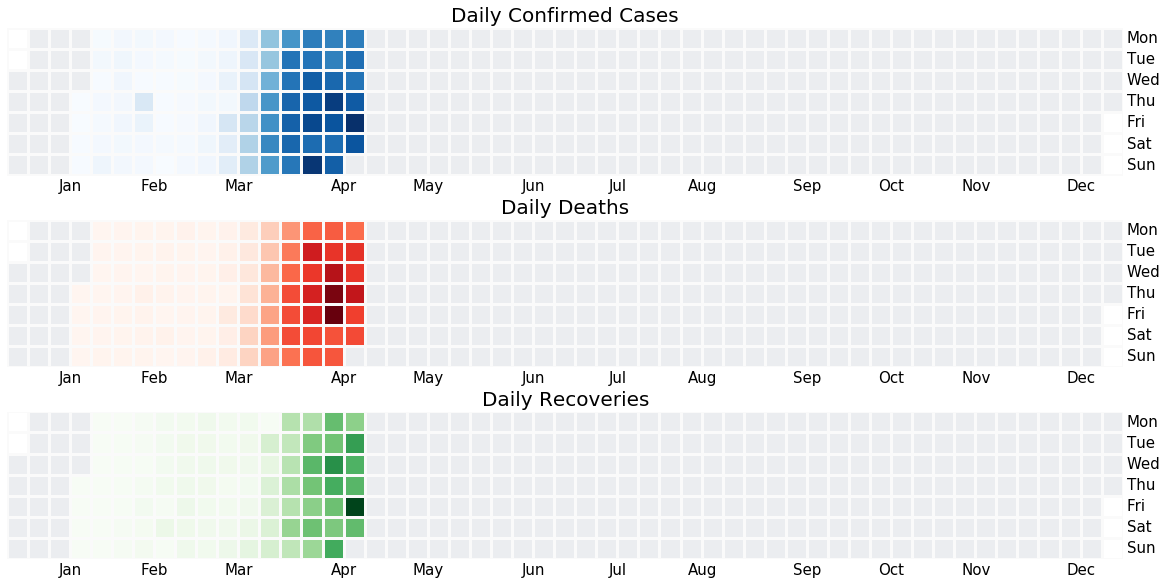

In [88]:
f = plt.figure(figsize=(20,10))
f.add_subplot(3,1,1)
calmap.yearplot(df_cal['Confirmed'], fillcolor='#ebedf0', cmap='Blues', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,2)
calmap.yearplot(dfd_cal['Dead'], fillcolor='#ebedf0', cmap='Reds', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,3)
calmap.yearplot(dfr_cal['Recovered'], fillcolor='#ebedf0', cmap='Greens', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Recoveries",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

# Testing information

In [237]:
testing = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

In [238]:
testing.head()

Entity        Date  \
0  Argentina - tests performed  2020-04-08   
1  Argentina - tests performed  2020-04-09   
2  Argentina - tests performed  2020-04-10   
3  Argentina - tests performed  2020-04-11   
4  Argentina - tests performed  2020-04-13   

                                          Source URL             Source label  \
0  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
1  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
2  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
3  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   
4  https://www.argentina.gob.ar/sites/default/fil...  Government of Argentina   

  Notes  Cumulative total  Daily change in cumulative total  \
0   NaN             13330                               NaN   
1   NaN             14850                            1520.0   
2   NaN             16379                            1529.0   
3   NaN             18027                            1648.0   
4   NaN             19758                               NaN   

   Cumulative total per thousand  \
0                          0.293   
1                          0.326   
2                          0.360   
3                          0.396   
4                          0.434   

   Daily change in cumulative total per thousand  \
0                                            NaN   
1                                          0.033   
2                                          0.034   
3                                          0.036   
4                                            NaN   

   3-day rolling mean daily change  \
0                              NaN   
1                              NaN   
2                              NaN   
3                         1565.667   
4                              NaN   

   3-day rolling mean daily change per thousand  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                         0.034  
4                                           NaN

In [239]:
testing = testing[['Entity', 'Date', 'Cumulative total', 'Cumulative total per thousand']]
testing['Entity'] = testing['Entity'].apply(lambda x: x.split('-')[0].strip())

In [240]:
testing.replace('United States', 'US', inplace = True)
testing.replace('South Korea', 'Korea, South', inplace = True)
testing.replace('Myanmar', 'Burma', inplace = True)
testing.replace('Czech Republic', 'Czechia', inplace = True)
testing.replace('Taiwan', 'Taiwan*', inplace = True)

In [241]:
# set(testing['Entity'].unique())
# len(set(df_time['Country/Region'].unique()))
set(testing['Entity'].unique()) - set(df_time['Country/Region'].unique())


{'Hong Kong'}

In [242]:
testing['Date'] = pd.to_datetime(testing.Date)

In [243]:
# testing

In [244]:
testing = testing.rename(columns = {'Entity':'Country/Region'})

In [245]:
# testing_group = testing.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
testing = testing.drop_duplicates(subset =['Country/Region', 'Date'], 
                     keep = 'first') 

In [246]:
# country = 'US'
# l_date = testing[testing['Country/Region'] == country]['Date'].max()
# int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
lol = []
for country in set(testing['Country/Region'].unique()):
    l_date = testing[testing['Country/Region'] == country]['Date'].max()
    total = int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
    lol.append([country, total])

In [247]:
latest_test = pd.DataFrame(lol, columns = ['Country/Region', 'Cumulative total'])
latest_test.head()

Country/Region  Cumulative total
0        Belgium            188196
1         Norway            155125
2    Philippines             72657
3         France            595154
4             US           4883802

In [248]:
testing_group = latest_test.merge(dfc_latest[['Country/Region', 'Confirmed']], on=['Country/Region'])\
[['Country/Region', 'Cumulative total', 'Confirmed']]

In [249]:
testing_group["Positive"] = np.round(100*testing_group["Confirmed"]/testing_group["Cumulative total"],2)

In [250]:
testing_group.dropna()\
            .sort_values(['Cumulative total', 'Positive']
                         , ascending=False).head(20)\
            .style.background_gradient(cmap='Blues',subset=["Cumulative total"])\
            .background_gradient(cmap='Purples',subset=["Positive"])\
            .background_gradient(cmap='Reds',subset=["Confirmed"])\

#                         .background_gradient(cmap='Greens',subset=["confirmed"])\
#                         .background_gradient(cmap='Purples',subset=["deaths"])\
#                         .background_gradient(cmap='YlOrBr',subset=["MR"])\
#                         .background_gradient(cmap='bone_r',subset=["Positive"])

In [267]:
top_l = list(testing_group.sort_values(['Cumulative total'], ascending=False).head(20)['Country/Region'])

fig = px.line(testing[[x in top_l for x in testing['Country/Region']]].sort_values('Date'), 
              x="Date", y="Cumulative total", color="Country/Region")
fig.show()

In [37]:
dfc_latest = df_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Confirmed'})
dfd_latest = dfd_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Dead'})
dfr_latest = dfr_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Recovered'})

# dfd_latest

In [38]:
df_comb = dfc_latest.merge(dfd_latest, 
                           on=['Country/Region', 'Lat', 'Long']).merge(dfr_latest, 
                                                                       on=['Country/Region', 'Lat', 'Long'])
df_comb.head()

Country/Region      Lat     Long  Confirmed  Dead  Recovered
0    Afghanistan  33.0000  65.0000       1463    47        188
1        Albania  41.1533  20.1683        712    27        403
2        Algeria  28.0339   1.6596       3256   419       1479
3        Andorra  42.5063   1.5218        738    40        344
4         Angola -11.2027  17.8739         25     2          6

In [39]:
df_time_comb = df_time.merge(dfd_time, 
                             on=['Country/Region', 'Lat', 'Long', 'Date']).merge(dfr_time, 
                                                                                 on=['Country/Region', 'Lat', 'Long', 'Date'])
df_time_comb.head()

Country/Region      Lat     Long       Date  Confirmed  Dead  Recovered
0    Afghanistan  33.0000  65.0000 2020-01-23          0     0          0
1        Albania  41.1533  20.1683 2020-01-23          0     0          0
2        Algeria  28.0339   1.6596 2020-01-23          0     0          0
3        Andorra  42.5063   1.5218 2020-01-23          0     0          0
4         Angola -11.2027  17.8739 2020-01-23          0     0          0

In [40]:
df_time_comb['Active'] = df_time_comb['Confirmed'] - (df_time_comb['Recovered'] + df_time_comb['Dead'])
df_time_comb.head()

Country/Region      Lat     Long       Date  Confirmed  Dead  Recovered  \
0    Afghanistan  33.0000  65.0000 2020-01-23          0     0          0   
1        Albania  41.1533  20.1683 2020-01-23          0     0          0   
2        Algeria  28.0339   1.6596 2020-01-23          0     0          0   
3        Andorra  42.5063   1.5218 2020-01-23          0     0          0   
4         Angola -11.2027  17.8739 2020-01-23          0     0          0   

   Active  
0       0  
1       0  
2       0  
3       0  
4       0

In [41]:
df_time_comb_rad = df_time_comb.drop(columns = ['Confirmed'])

In [42]:
df_total_time = df_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
df_total_time = df_total_time.melt(id_vars="Date", 
                                   value_vars=['Dead', 'Recovered', 'Active'], 
                                   var_name='Status', value_name='Total')
# df_total_time.sort_values(by = 'Date', inplace=True)

In [43]:
col_seq = ['red', 'Green', 'orange']

# Reports over time

In [44]:
df_total_time.head()

Date Status  Total
0 2020-01-23   Dead     18
1 2020-01-24   Dead     26
2 2020-01-25   Dead     42
3 2020-01-26   Dead     56
4 2020-01-27   Dead     82

In [45]:
fig = px.line(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

In [46]:
fig = px.area(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# China's cases over time

In [47]:
china_time_comb = df_time_comb[df_time_comb['Country/Region'] == 'China']
china_time_comb.head()

Country/Region        Lat       Long       Date  Confirmed  Dead  \
34           China  1083.3367  3684.4197 2020-01-23        643    18   
208          China  1083.3367  3684.4197 2020-01-24        920    26   
382          China  1083.3367  3684.4197 2020-01-25       1406    42   
556          China  1083.3367  3684.4197 2020-01-26       2075    56   
730          China  1083.3367  3684.4197 2020-01-27       2877    82   

     Recovered  Active  
34          30     595  
208         36     858  
382         39    1325  
556         49    1970  
730         58    2737

In [48]:
china_time_comb_rad = china_time_comb.drop(columns = ['Confirmed'])

In [49]:
china_total_time = china_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
china_total_time = china_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# china_total_time.sort_values(by = 'Date', inplace=True)

In [50]:
fig = px.line(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

In [51]:
fig = px.area(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# Rest of the world excluding China

In [52]:
others_time_comb = df_time_comb[df_time_comb['Country/Region'] != 'China']
others_time_comb.head()

Country/Region      Lat     Long       Date  Confirmed  Dead  Recovered  \
0    Afghanistan  33.0000  65.0000 2020-01-23          0     0          0   
1        Albania  41.1533  20.1683 2020-01-23          0     0          0   
2        Algeria  28.0339   1.6596 2020-01-23          0     0          0   
3        Andorra  42.5063   1.5218 2020-01-23          0     0          0   
4         Angola -11.2027  17.8739 2020-01-23          0     0          0   

   Active  
0       0  
1       0  
2       0  
3       0  
4       0

In [53]:
others_time_comb_rad = others_time_comb.drop(columns = ['Confirmed'])

In [54]:
others_total_time = others_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
others_total_time = others_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# others_total_time.sort_values(by = 'Date', inplace=True)

In [55]:
fig = px.line(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

In [56]:
fig = px.area(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# Ranking by country

In [57]:
df_country[['Country_Region', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']]\
                        .dropna()\
                        .sort_values(['Active', 'Confirmed', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']
                                     , ascending=False).head(20)\
                        .style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

## Highest number of confirmed cases

In [58]:
df_comb['Active'] = df_comb['Confirmed'] - (df_comb['Dead'] - df_comb['Recovered'])

In [59]:
df_comb.head()

Country/Region      Lat     Long  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.0000  65.0000       1463    47        188    1604
1        Albania  41.1533  20.1683        712    27        403    1088
2        Algeria  28.0339   1.6596       3256   419       1479    4316
3        Andorra  42.5063   1.5218        738    40        344    1042
4         Angola -11.2027  17.8739         25     2          6      29

In [60]:
fig = px.bar(df_comb.sort_values('Confirmed').tail(15), x="Confirmed", color_discrete_sequence=['orange'],
             y="Country/Region", text='Confirmed', orientation='h')
fig.show()

## Highest number of deaths

In [61]:
fig = px.bar(df_comb.sort_values('Dead').tail(15), x="Dead", color_discrete_sequence=['red'],
             y="Country/Region", text='Dead', orientation='h')
fig.show()

## Highest number of recoveries

In [62]:
fig = px.bar(df_comb.sort_values('Recovered').tail(15), x="Recovered", color_discrete_sequence=['green'],
             y="Country/Region", text='Recovered', orientation='h')
fig.show()

## Highest number of active cases

In [63]:
fig = px.bar(df_comb.sort_values('Active').tail(15), x="Active", color_discrete_sequence=['#D63230'],
             y="Country/Region", text='Active', orientation='h')
fig.show()

## Highest mortality rates

In [64]:
df_comb['Mortality'] = round((df_comb['Dead']/df_comb['Confirmed'])*100, 2)

In [65]:
fig = px.bar(df_comb.sort_values('Mortality').tail(15), x="Mortality", y="Country/Region"
             , text='Mortality', orientation='h')
fig.show()

# Oxford COVID-19 Government Response Tracker

In [66]:
df_govres = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

In [67]:
df_govres.head()

CountryName CountryCode      Date  S1_School closing  S1_IsGeneral  \
0       Aruba         ABW  20200101                0.0           NaN   
1       Aruba         ABW  20200102                0.0           NaN   
2       Aruba         ABW  20200103                0.0           NaN   
3       Aruba         ABW  20200104                0.0           NaN   
4       Aruba         ABW  20200105                0.0           NaN   

   S2_Workplace closing  S2_IsGeneral  S3_Cancel public events  S3_IsGeneral  \
0                   0.0           NaN                      0.0           NaN   
1                   0.0           NaN                      0.0           NaN   
2                   0.0           NaN                      0.0           NaN   
3                   0.0           NaN                      0.0           NaN   
4                   0.0           NaN                      0.0           NaN   

   S4_Close public transport  ...  S9_Monetary measures  \
0                        0.0  ...                   0.0   
1                        0.0  ...                   0.0   
2                        0.0  ...                   0.0   
3                        0.0  ...                   0.0   
4                        0.0  ...                   0.0   

   S10_Emergency investment in health care  S11_Investment in Vaccines  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   

   S12_Testing framework  S13_Contact tracing  ConfirmedCases  \
0                    0.0                  0.0             NaN   
1                    0.0                  0.0             NaN   
2                    0.0                  0.0             NaN   
3                    0.0                  0.0             NaN   
4                    0.0                  0.0             NaN   

   ConfirmedDeaths  StringencyIndex  StringencyIndexForDisplay  Unnamed: 26  
0              NaN              0.0                        0.0           \t  
1              NaN              0.0                        0.0           \t  
2              NaN              0.0                        0.0           \t  
3              NaN              0.0                        0.0           \t  
4              NaN              0.0                        0.0           \t  

[5 rows x 27 columns]

In [68]:
# df_govres.info()

In [69]:
df_govres = df_govres[['CountryName', 'CountryCode', 'Date', 'StringencyIndex']].reindex()
# df_govres = df_govres[['CountryName', 'CountryCode', 'Date'
#                        , 'StringencyIndexForDisplay']].rename(columns = 
#                                                               {'StringencyIndexForDisplay':'StringencyIndex'}).reindex()

df_govres.head()

CountryName CountryCode      Date  StringencyIndex
0       Aruba         ABW  20200101              0.0
1       Aruba         ABW  20200102              0.0
2       Aruba         ABW  20200103              0.0
3       Aruba         ABW  20200104              0.0
4       Aruba         ABW  20200105              0.0

In [70]:
df_govres['Date'] = pd.to_datetime(df_govres['Date'], format='%Y%m%d')

In [71]:
df_govres.tail()

CountryName CountryCode       Date  StringencyIndex
17277      Kosovo         RKS 2020-04-19            90.48
17278      Kosovo         RKS 2020-04-20            90.48
17279      Kosovo         RKS 2020-04-21              NaN
17280      Kosovo         RKS 2020-04-22              NaN
17281      Kosovo         RKS 2020-04-23              NaN

In [72]:
df_govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17282 entries, 0 to 17281
Data columns (total 4 columns):
CountryName        17282 non-null object
CountryCode        17282 non-null object
Date               17282 non-null datetime64[ns]
StringencyIndex    16307 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 540.2+ KB


In [73]:
len(df_govres['CountryName'].unique())

151

In [74]:
# df_govres = df_govres.ffill(axis = 0)

In [75]:
# df_govres = df_govres.dropna()

In [76]:
most_recent_date = df_govres['Date'].max()
first_date = df_govres['Date'].min()

print(first_date, most_recent_date)

2020-01-01 00:00:00 2020-04-24 00:00:00


In [77]:
dates = pd.date_range(start = first_date, end = most_recent_date)

In [78]:
countries = df_govres['CountryName'].unique()
lol = []
for country in tqdm(countries):
    for date in dates:
        res = df_govres[['CountryName','Date', 'StringencyIndex']][(df_govres['CountryName'] == country) &
                        (df_govres['Date'] == date)].values.tolist()
        if len(res) == 0:
            lol.append([country, date, np.nan])
        else:
            lol.append(res[0])

In [79]:
govres = pd.DataFrame(lol, columns = ['CountryName','Date', 'StringencyIndex']).ffill(axis = 0)
# govres = df_govres

In [80]:
govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17365 entries, 0 to 17364
Data columns (total 3 columns):
CountryName        17365 non-null object
Date               17365 non-null datetime64[ns]
StringencyIndex    17365 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 407.1+ KB


In [81]:
govres_last= govres[govres['Date'] == most_recent_date]
govres_last.head()

CountryName       Date  StringencyIndex
114        Aruba 2020-04-24            85.71
229  Afghanistan 2020-04-24            71.43
344       Angola 2020-04-24            71.43
459      Albania 2020-04-24            85.71
574      Andorra 2020-04-24            71.43

In [82]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = govres_last['CountryName'],
    z = govres_last['StringencyIndex'],
    text = govres_last['CountryName'],
    colorscale = 'Blues',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Response stringency %',
    zmax = 100,
    zmin = 0
))

fig.update_layout(
    title_text='Government response',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

In [83]:
govres['Date'] = govres['Date'].dt.strftime('%Y/%m/%d')

In [84]:
fig = px.choropleth(govres, locationmode = "country names",
                    locations = 'CountryName',
                    color="StringencyIndex",
                    hover_name="CountryName", 
                    color_continuous_scale='Blues',
                    range_color= [0, 100],
                    animation_frame="Date")

fig.update_layout(
    title_text='Government response to Covid 19',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()